In [1]:
base_dir = '/content/drive/MyDrive/'
notebook_dir = base_dir + 'Colab\ Notebooks/'
data_dir = base_dir + 'Datasets/'

#Transcription Code (I didnt Run it here)

In [ ]:
import os
from pathlib import Path

In [ ]:
# === Set up paths ===
ad_audio_path = "/content/drive/MyDrive/Datasets/ADReSSo21/diagnosis/train/audio/ad/"
cn_audio_path = "/content/drive/MyDrive/Datasets/ADReSSo21/diagnosis/train/audio/cn/"

transcript_ad_path = "/content/drive/MyDrive/Datasets/ADReSSo21/diagnosis/train/transcript_ad/"
transcript_cn_path = "/content/drive/MyDrive/Datasets/ADReSSo21/diagnosis/train/transcript_cn/"

pcm_folder = "/content/pcm_temp"
os.makedirs(transcript_ad_path, exist_ok=True)
os.makedirs(transcript_cn_path, exist_ok=True)
os.makedirs(pcm_folder, exist_ok=True)

In [ ]:
def transcribe_and_save(audio_file, label, client, save_path):
    filename = Path(audio_file).stem
    output_pcm = f"{pcm_folder}/{filename}.pcm"

    # Convert audio to PCM
    try:
        convert_to_pcm(audio_file, output_pcm)
    except Exception as e:
        print(f"⚠️ Failed to convert {audio_file}: {e}")
        return

    # Transcribe
    try:
        chunks = split_audio(output_pcm)
        full_transcript = ""
        for i, chunk in enumerate(chunks):
            chunk_file = f"{pcm_folder}/chunk_{filename}_{i}.pcm"
            chunk.export(chunk_file, format="s16le")
            print(f"📢 Processing {label.upper()} chunk {i+1}/{len(chunks)} for {filename}")
            chunk_text = client.transcribe_chunk(chunk_file)
            full_transcript += chunk_text + " "

        # Save the transcript with label
        transcript_filename = f"{save_path}/{filename}.txt"
        with open(transcript_filename, "w") as f:
            f.write(f"LABEL: {label.upper()}\n{full_transcript.strip()}")
        print(f"✅ Transcript saved: {transcript_filename}")

    except Exception as e:
        print(f"❌ Failed to process {audio_file}: {e}")

In [ ]:
# === Initialize ASR client ===
APPID = 'ga637f40'
APIKey = 'e83d852f6c7ea7fead63ccaeee9271e9'
APISecret = '2b8d35fce36129e4b290158909e144c8'

client = ASRClient(APPID, APIKey, APISecret)

In [ ]:
# === Process AD files ===
ad_files = [os.path.join(ad_audio_path, f) for f in os.listdir(ad_audio_path) if f.endswith(".wav")]
for file in ad_files:
    transcribe_and_save(file, label="ad", client=client, save_path=transcript_ad_path)

In [ ]:
# === Process CN files ===
cn_files = [os.path.join(cn_audio_path, f) for f in os.listdir(cn_audio_path) if f.endswith(".wav")]
for file in cn_files:
    transcribe_and_save(file, label="cn", client=client, save_path=transcript_cn_path)

In [ ]:
##Test Data

# ----- Set up API credentials -----
APPID = 'ga637f40'
APIKey = 'e83d852f6c7ea7fead63ccaeee9271e9'
APISecret = '2b8d35fce36129e4b290158909e144c8'

# ----- Set up Paths -----
test_audio_path = "/content/drive/MyDrive/Datasets/ADReSSo21/diagnosis/test-dist/audio/"
ground_truth_path = "/content/drive/MyDrive/Datasets/ADReSSo21/diagnosis/test-dist/ground_truth.csv"
#Outpu driectory for saving test transc
transcript_test_path = "/content/drive/MyDrive/Datasets/ADReSSo21/diagnosis/test-dist/transcripts/"
pcm_folder = "/content/pcm_temp"

# Create required directories if they don't exist
os.makedirs(transcript_test_path, exist_ok=True)
os.makedirs(pcm_folder, exist_ok=True)

label_map = {"Control": "cn", "ProbableAD": "ad"}


# === Transcription Function ===
def transcribe_and_save(audio_file, label, client, save_path):
    filename = Path(audio_file).stem
    output_pcm = f"{pcm_folder}/{filename}.pcm"

    try:
        convert_to_pcm(audio_file, output_pcm)
    except Exception as e:
        print(f"⚠️ Failed to convert {audio_file}: {e}")
        return

    try:
        chunks = split_audio(output_pcm)
        full_transcript = ""
        for i, chunk in enumerate(chunks):
            chunk_file = f"{pcm_folder}/chunk_{filename}_{i}.pcm"
            chunk.export(chunk_file, format="s16le")
            print(f"📢 Processing {label.upper()} chunk {i+1}/{len(chunks)} for {filename}")
            chunk_text = client.transcribe_chunk(chunk_file)
            full_transcript += chunk_text + " "

        transcript_filename = f"{save_path}/{filename}.txt"
        with open(transcript_filename, "w") as f:
            f.write(f"LABEL: {label.upper()}\n{full_transcript.strip()}")
        print(f"✅ Transcript saved: {transcript_filename}")

    except Exception as e:
        print(f"❌ Failed to process {audio_file}: {e}")

# === Read Ground Truth and Transcribe All ===
df = pd.read_csv(ground_truth_path)
filename_to_label = {row['filename']: label_map[row['status']] for _, row in df.iterrows()}

for filename, label in filename_to_label.items():
    audio_file = os.path.join(test_audio_path, filename + ".wav")
    if os.path.exists(audio_file):
        transcribe_and_save(audio_file, label, client, transcript_test_path)
    else:
        print(f"⚠️ Audio file not found: {audio_file}")

In [ ]:
!pip uninstall -y numpy gensim

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: gensim 4.3.1
Uninstalling gensim-4.3.1:
  Successfully uninstalled gensim-4.3.1


In [ ]:
!pip install numpy==1.26.4 gensim==4.3.1

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached gensim-4.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.4 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached gensim-4.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install scipy==1.12

In [ ]:
!pip install git+https://github.com/piskvorky/gensim.git@develop

  Cloning https://github.com/piskvorky/gensim.git (to revision develop) to /tmp/pip-req-build-9a8ni5j_
  Running command git clone --filter=blob:none --quiet https://github.com/piskvorky/gensim.git /tmp/pip-req-build-9a8ni5j_
  Resolved https://github.com/piskvorky/gensim.git to commit 6591e008f065017adce9d25113a036864e3a9dc6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gensim: filename=gensim-4.3.3-cp311-cp311-linux_x86_64.whl size=26130940 sha256=756d442bc3913f450b3f18297f563b2358b151e0b457d43414e6f2ec69a57882
  Stored in directory: /tmp/pip-ephem-wheel-cache-bmo396vn/wheels/60/e7/97/a35b81b66356ad3ff3b5a928da275836e8f2fadd283e19385c
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.1
    Uninstalling gensim-4.3.1:
      Successfully uninstalled gensim-4.3.1


In [ ]:
!pip install gensim nltk scikit-learn numpy pandas matplotlib seaborn joblib

RESTART SESSION!

In [2]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [18]:
from nltk.tokenize import word_tokenize

sample_text = "This is a test sentence."
tokens = word_tokenize(sample_text)
print(tokens)

['This', 'is', 'a', 'test', 'sentence', '.']


In [4]:
import os
import re
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch
from transformers import BertTokenizer, BertModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

#Fine Tuning BERT on our Dataset so we can etxarct features later

In [5]:
from transformers import BertModel, BertTokenizer
import torch

# Set device for torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the pretrained BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)
bert_model.eval()  # Put BERT in evaluation mode

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [9]:
from torch.optim import AdamW

# Fine-tuning the BERT model
optimizer = AdamW(bert_model.parameters(), lr=1e-5)


In [8]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

In [6]:
# Training data transcripts (each file starts with: "LABEL: AD" or "LABEL: CN")
AD_TRANSCRIPT_DIR = '/content/drive/MyDrive/Datasets/ADReSSo21/diagnosis/train/transcript_ad/'
CN_TRANSCRIPT_DIR = '/content/drive/MyDrive/Datasets/ADReSSo21/diagnosis/train/transcript_cn/'

# Unseen test data transcripts (structure same as training, first line gives label)
TEST_TRANSCRIPT_DIR = "/content/drive/MyDrive/Datasets/ADReSSo21/diagnosis/test-dist/transcripts/"

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# BERT Feature Extraction Setup
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)  # num_labels=2 for binary classification
bert_model.eval()

def extract_bert_features(text):
    """Extract a combined BERT feature (CLS, mean, max) from text."""
    tokens = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    tokens = {key: val.to(device) for key, val in tokens.items()}
    with torch.no_grad():
        outputs = bert_model(**tokens)
    cls_embedding = outputs.logits[:, 0]  # [CLS] token (last hidden state logits)
    return cls_embedding.cpu().numpy().flatten()

# Data Loading & Preprocessing Functions
def parse_transcript(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    if len(lines) == 0:
        return None, ""
    label_match = re.match(r'LABEL:\s*(AD|CN)', lines[0].strip(), flags=re.IGNORECASE)
    label = label_match.group(1).upper() if label_match else None
    text = " ".join(line.strip() for line in lines[1:]).strip()
    return label, text

def load_dataset(transcript_dir):
    texts = []
    labels = []
    for file in tqdm(os.listdir(transcript_dir), desc="Loading transcripts"):
        if file.endswith('.txt'):
            file_path = os.path.join(transcript_dir, file)
            label_str, text = parse_transcript(file_path)
            if text:
                texts.append(text)
                labels.append(1 if label_str == "AD" else 0)
    return texts, np.array(labels)

# Load training and test data
train_texts = []
train_labels = []
for folder, lbl in [(AD_TRANSCRIPT_DIR, 1), (CN_TRANSCRIPT_DIR, 0)]:
    for file in tqdm(os.listdir(folder), desc=f"Loading {folder}"):
        if file.endswith('.txt'):
            file_path = os.path.join(folder, file)
            with open(file_path, 'r', encoding='utf-8') as f:
                content = f.read().strip()
            content = re.sub(r'^LABEL:\s*(AD|CN)\s*', '', content, flags=re.IGNORECASE).strip()
            if content:
                train_texts.append(content)
                train_labels.append(lbl)
train_labels = np.array(train_labels)

test_texts, test_labels = load_dataset(TEST_TRANSCRIPT_DIR)

# Feature Extraction (BERT and TF-IDF)
bert_features_train = np.array([extract_bert_features(text) for text in tqdm(train_texts)])
tfidf = TfidfVectorizer(max_features=300)
tfidf_features_train = tfidf.fit_transform(train_texts).toarray()

X_train_full = np.hstack([bert_features_train, tfidf_features_train])
y_train_full = train_labels

bert_features_test = np.array([extract_bert_features(text) for text in tqdm(test_texts)])
tfidf_features_test = tfidf.transform(test_texts).toarray()
X_test_full = np.hstack([bert_features_test, tfidf_features_test])
y_test_full = test_labels

# Preprocessing Pipeline: Scaling and PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_full)

pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fine-tuning BERT Model
optimizer = AdamW(bert_model.parameters(), lr=1e-5)

def fine_tune_bert(train_texts, labels):
    """Fine-tune the BERT model for sequence classification."""
    bert_model.train()
    for epoch in range(3):  # Fine-tune for 3 epochs
        for text, label in zip(train_texts, labels):
            tokens = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
            tokens = {key: val.to(device) for key, val in tokens.items()}
            labels_tensor = torch.tensor([label]).to(device)
            optimizer.zero_grad()
            outputs = bert_model(**tokens, labels=labels_tensor)
            loss = outputs.loss
            loss.backward()
            optimizer.step()

fine_tune_bert(train_texts, train_labels)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Loading /content/drive/MyDrive/Datasets/ADReSSo21/diagnosis/train/transcript_ad/: 100%|██████████| 87/87 [00:22<00:00,  3.88it/s]
Loading /content/drive/MyDrive/Datasets/ADReSSo21/diagnosis/train/transcript_cn/: 100%|██████████| 79/79 [00:18<00:00,  4.30it/s]
100%|██████████| 71/71 [00:21<00:00,  3.30it/s]


In [22]:
# Save fine-tuned model weights
save_path = "fine_tuned_bert.pth"
torch.save(bert_model.state_dict(), save_path)
print(f"Model weights saved to {save_path}")

Model weights saved to fine_tuned_bert.pth


In [23]:
# Load fine-tuned weights into a fresh BERT model
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)
bert_model.load_state_dict(torch.load("fine_tuned_bert.pth", map_location=device))
bert_model.eval()
print("Fine-tuned model loaded successfully.")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fine-tuned model loaded successfully.


For Loading in Future

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

Not needed until I find end

In [26]:
'''# Best hyperparameters (picked manually)
best_params = {
    'lr__C': 0.1,
    'rf__n_estimators': 100,
    'svm__C': 1.0,
    'xgb__learning_rate': 0.01
}

# Model initializations with best params
model_lr = LogisticRegression(C=best_params['lr__C'], class_weight='balanced', max_iter=1000, random_state=42)
model_rf = RandomForestClassifier(n_estimators=best_params['rf__n_estimators'], random_state=42)
model_svm = SVC(kernel='rbf', C=best_params['svm__C'], class_weight='balanced', probability=True, random_state=42)
model_xgb = XGBClassifier(learning_rate=best_params['xgb__learning_rate'], use_label_encoder=False, eval_metric='logloss', random_state=42)

# Ensemble model (Voting Classifier)
ensemble = VotingClassifier(estimators=[
    ('lr', model_lr),
    ('rf', model_rf),
    ('svm', model_svm),
    ('xgb', model_xgb)
], voting='soft') '''

"# Best hyperparameters (picked manually)\nbest_params = {\n    'lr__C': 0.1,\n    'rf__n_estimators': 100,\n    'svm__C': 1.0,\n    'xgb__learning_rate': 0.01\n}\n\n# Model initializations with best params\nmodel_lr = LogisticRegression(C=best_params['lr__C'], class_weight='balanced', max_iter=1000, random_state=42)\nmodel_rf = RandomForestClassifier(n_estimators=best_params['rf__n_estimators'], random_state=42)\nmodel_svm = SVC(kernel='rbf', C=best_params['svm__C'], class_weight='balanced', probability=True, random_state=42)\nmodel_xgb = XGBClassifier(learning_rate=best_params['xgb__learning_rate'], use_label_encoder=False, eval_metric='logloss', random_state=42)\n\n# Ensemble model (Voting Classifier)\nensemble = VotingClassifier(estimators=[\n    ('lr', model_lr),\n    ('rf', model_rf),\n    ('svm', model_svm),\n    ('xgb', model_xgb)\n], voting='soft') "

In [28]:
'''
# Train ensemble on full training data
ensemble.fit(X_train_pca, y_train_full) '''

'\n# Train ensemble on full training data\nensemble.fit(X_train_pca, y_train_full) '

In [29]:
'''# Evaluate on test data
y_pred_test = ensemble.predict(X_test_pca)
print("\nFinal Model Classification Report on Test Data:")
print(classification_report(y_test_full, y_pred_test, target_names=["CN", "AD"]))

# Confusion Matrix
cm = confusion_matrix(y_test_full, y_pred_test)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["CN", "AD"], yticklabels=["CN", "AD"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Test Data")
plt.show() '''

'# Evaluate on test data\ny_pred_test = ensemble.predict(X_test_pca)\nprint("\nFinal Model Classification Report on Test Data:")\nprint(classification_report(y_test_full, y_pred_test, target_names=["CN", "AD"]))\n\n# Confusion Matrix\ncm = confusion_matrix(y_test_full, y_pred_test)\nplt.figure(figsize=(6, 5))\nsns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["CN", "AD"], yticklabels=["CN", "AD"])\nplt.xlabel("Predicted Label")\nplt.ylabel("True Label")\nplt.title("Confusion Matrix - Test Data")\nplt.show() '

In [30]:
'''joblib.dump(ensemble, '/content/tuned_ensemble_model.pkl')
joblib.dump(scaler, '/content/tuned_scaler.pkl')
joblib.dump(pca, '/content/tuned_pca.pkl')
joblib.dump(tfidf, '/content/tuned_tfidf_vectorizer.pkl')
print("Models and preprocessing objects saved.") '''

'joblib.dump(ensemble, \'/content/tuned_ensemble_model.pkl\')\njoblib.dump(scaler, \'/content/tuned_scaler.pkl\')\njoblib.dump(pca, \'/content/tuned_pca.pkl\')\njoblib.dump(tfidf, \'/content/tuned_tfidf_vectorizer.pkl\')\nprint("Models and preprocessing objects saved.") '

end

##Lingusitic Feature Extraction using the Find tuned BERT

In [32]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize from base model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)

# Load fine-tuned weights
checkpoint_path = 'fine_tuned_bert.pth'
bert_model.load_state_dict(torch.load(checkpoint_path, map_location=device))
bert_model.eval()

# Extract BERT CLS Features
def extract_bert_features(text):
    tokens = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    tokens = {key: val.to(device) for key, val in tokens.items()}
    with torch.no_grad():
        outputs = bert_model(**tokens)
    cls_embedding = outputs.logits[:, 0]  # Get [CLS]-like representation from logits
    return cls_embedding.cpu().numpy().flatten()

# Data Loading & Preprocessing Functions
def parse_transcript(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    if len(lines) == 0:
        return None, ""
    label_match = re.match(r'LABEL:\s*(AD|CN)', lines[0].strip(), flags=re.IGNORECASE)
    label = label_match.group(1).upper() if label_match else None
    text = " ".join(line.strip() for line in lines[1:]).strip()
    return label, text

def load_dataset(transcript_dir):
    texts = []
    labels = []
    for file in tqdm(os.listdir(transcript_dir), desc="Loading transcripts"):
        if file.endswith('.txt'):
            file_path = os.path.join(transcript_dir, file)
            label_str, text = parse_transcript(file_path)
            if text:
                texts.append(text)
                labels.append(1 if label_str == "AD" else 0)
    return texts, np.array(labels)

# Load training and test data
train_texts = []
train_labels = []
for folder, lbl in [(AD_TRANSCRIPT_DIR, 1), (CN_TRANSCRIPT_DIR, 0)]:
    for file in tqdm(os.listdir(folder), desc=f"Loading {folder}"):
        if file.endswith('.txt'):
            file_path = os.path.join(folder, file)
            with open(file_path, 'r', encoding='utf-8') as f:
                content = f.read().strip()
            content = re.sub(r'^LABEL:\s*(AD|CN)\s*', '', content, flags=re.IGNORECASE).strip()
            if content:
                train_texts.append(content)
                train_labels.append(lbl)
train_labels = np.array(train_labels)

test_texts, test_labels = load_dataset(TEST_TRANSCRIPT_DIR)

# Feature Extraction (BERT and TF-IDF)
bert_features_train = np.array([extract_bert_features(text) for text in tqdm(train_texts)])
tfidf = TfidfVectorizer(max_features=300)
tfidf_features_train = tfidf.fit_transform(train_texts).toarray()

X_train_full = np.hstack([bert_features_train, tfidf_features_train])
y_train_full = train_labels

bert_features_test = np.array([extract_bert_features(text) for text in tqdm(test_texts)])
tfidf_features_test = tfidf.transform(test_texts).toarray()
X_test_full = np.hstack([bert_features_test, tfidf_features_test])
y_test_full = test_labels

# Preprocessing Pipeline: Scaling and PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_full)

pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

'''
# Define the models and hyperparameters
svm = SVC(C=1.0, kernel='linear')
rf = RandomForestClassifier(n_estimators=100)
xgb = XGBClassifier(learning_rate=0.2, n_estimators=100)

##Not needed until end


# Train on the features
svm.fit(X_train_pca, y_train_full)
rf.fit(X_train_pca, y_train_full)
xgb.fit(X_train_pca, y_train_full)

# Evaluate on Test Data
y_pred_svm = svm.predict(X_test_pca)
y_pred_rf = rf.predict(X_test_pca)
y_pred_xgb = xgb.predict(X_test_pca)

# Combine results (majority vote)
y_pred_final = np.round((y_pred_svm + y_pred_rf + y_pred_xgb) / 3)

# Classification Report
print("\nFinal Model Classification Report on Test Data:")
print(classification_report(y_test_full, y_pred_final, target_names=["CN", "AD"]))

# Plot Confusion Matrix
cm = confusion_matrix(y_test_full, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["CN", "AD"], yticklabels=["CN", "AD"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Test Data")
plt.show()
'''

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Loading /content/drive/MyDrive/Datasets/ADReSSo21/diagnosis/train/transcript_ad/:   0%|          | 0/87 [00:00<?, ?it/s]
Loading /content/drive/MyDrive/Datasets/ADReSSo21/diagnosis/train/transcript_ad/:  38%|███▊      | 33/87 [00:00<00:00, 328.96it/s]
Loading /content/drive/MyDrive/Datasets/ADReSSo21/diagnosis/train/transcript_ad/: 100%|██████████| 87/87 [00:00<00:00, 387.90it/s]

Loading /content/drive/MyDrive/Datasets/ADReSSo21/diagnosis/train/transcript_cn/:   0%|          | 0/79 [00:00<?, ?it/s]
Loading /content/drive/MyDrive/Datasets/ADReSSo21/diagnosis/train/transcript_cn/:  47%|████▋     | 37/79 [00:00<00:00, 369.30it/s]
Loading /content/drive/MyDrive/Datasets/ADReSSo21/diagnosis/train/tran

'\n# Define the models and hyperparameters\nsvm = SVC(C=1.0, kernel=\'linear\')\nrf = RandomForestClassifier(n_estimators=100)\nxgb = XGBClassifier(learning_rate=0.2, n_estimators=100)\n\n##Not needed until end\n\n\n# Train on the features\nsvm.fit(X_train_pca, y_train_full)\nrf.fit(X_train_pca, y_train_full)\nxgb.fit(X_train_pca, y_train_full)\n\n# Evaluate on Test Data\ny_pred_svm = svm.predict(X_test_pca)\ny_pred_rf = rf.predict(X_test_pca)\ny_pred_xgb = xgb.predict(X_test_pca)\n\n# Combine results (majority vote)\ny_pred_final = np.round((y_pred_svm + y_pred_rf + y_pred_xgb) / 3)\n\n# Classification Report\nprint("\nFinal Model Classification Report on Test Data:")\nprint(classification_report(y_test_full, y_pred_final, target_names=["CN", "AD"]))\n\n# Plot Confusion Matrix\ncm = confusion_matrix(y_test_full, y_pred_final)\nplt.figure(figsize=(6, 5))\nsns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["CN", "AD"], yticklabels=["CN", "AD"])\nplt.xlabel("Predicted Label"

In [33]:
# Save linguistic features (both train and test)
linguistic_features_train_df = pd.DataFrame(X_train_pca, columns=[f'ling_{i+1}' for i in range(X_train_pca.shape[1])])
linguistic_features_train_df['file_name'] = [f"train_file_{i}" for i in range(len(train_texts))]
linguistic_features_train_df['label'] = y_train_full

linguistic_features_test_df = pd.DataFrame(X_test_pca, columns=[f'ling_{i+1}' for i in range(X_test_pca.shape[1])])
linguistic_features_test_df['file_name'] = [f"test_file_{i}" for i in range(len(test_texts))]
linguistic_features_test_df['label'] = y_test_full

# Save to CSV
linguistic_features_train_df.to_csv('linguistic_features_train.csv', index=False)
linguistic_features_test_df.to_csv('linguistic_features_test.csv', index=False)

print("Linguistic features saved as 'linguistic_features_train.csv' and 'linguistic_features_test.csv'")

Linguistic features saved as 'linguistic_features_train.csv' and 'linguistic_features_test.csv'


In [34]:
'''from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Define the path to your saved model
saved_model_path = 'fine_tuned_bert.pth'

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Initialize the model architecture
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Load the saved weights
model.load_state_dict(torch.load(saved_model_path, map_location=torch.device('cpu')))

# Set the model to evaluation mode
model.eval()'''

"from transformers import BertTokenizer, BertForSequenceClassification\nimport torch\n\n# Define the path to your saved model\nsaved_model_path = 'fine_tuned_bert.pth'\n\n# Load the tokenizer\ntokenizer = BertTokenizer.from_pretrained('bert-base-uncased')\n\n# Initialize the model architecture\nmodel = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)\n\n# Load the saved weights\nmodel.load_state_dict(torch.load(saved_model_path, map_location=torch.device('cpu')))\n\n# Set the model to evaluation mode\nmodel.eval()"

In [36]:
'''# After training your model
xgb_model = XGBClassifier(learning_rate=0.2, n_estimators=100)
xgb_model.fit(X_train_pca, y_train_full)

# Save the model using the built-in save_model method
xgb_model.save_model('v2-xgb_model.json')'''

"# After training your model\nxgb_model = XGBClassifier(learning_rate=0.2, n_estimators=100)\nxgb_model.fit(X_train_pca, y_train_full)\n\n# Save the model using the built-in save_model method\nxgb_model.save_model('v2-xgb_model.json')"

In [35]:
'''import joblib
from xgboost import XGBClassifier

# Save the trained models
joblib.dump(svm, 'v2-svm_model.pkl')
joblib.dump(rf, 'v2-rf_model.pkl')


print("Models saved successfully!")'''

'import joblib\nfrom xgboost import XGBClassifier\n\n# Save the trained models\njoblib.dump(svm, \'v2-svm_model.pkl\')\njoblib.dump(rf, \'v2-rf_model.pkl\')\n\n\nprint("Models saved successfully!")'

In [37]:
'''import joblib

# Save the model
joblib.dump(xgb_model, 'v2-xgb_model.pkl')

# Load the model
xgb_model_loaded = joblib.load('v2-xgb_model.pkl') '''


"import joblib\n\n# Save the model\njoblib.dump(xgb_model, 'v2-xgb_model.pkl')\n\n# Load the model\nxgb_model_loaded = joblib.load('v2-xgb_model.pkl') "

#Adding File names so can be merged with Aocustic f

In [38]:
import pandas as pd
import os

# Load the linguistic features CSV files
linguistic_features_train_df = pd.read_csv('linguistic_features_train.csv')
linguistic_features_test_df = pd.read_csv('linguistic_features_test.csv')

# Get the list of file names for training data (AD and CN transcripts)
file_names_train = []
for folder in [AD_TRANSCRIPT_DIR, CN_TRANSCRIPT_DIR]:
    for file in os.listdir(folder):
        if file.endswith('.txt'):
            file_names_train.append(file)

# Get the list of file names for test data
file_names_test = []
for file in os.listdir(TEST_TRANSCRIPT_DIR):
    if file.endswith('.txt'):
        file_names_test.append(file)

# Add the 'file_name' column as the first column for both train and test data
linguistic_features_train_df['file_name'] = file_names_train
linguistic_features_test_df['file_name'] = file_names_test

# Reorder columns to ensure 'file_name' is the first column
linguistic_features_train_df = linguistic_features_train_df[['file_name'] + [col for col in linguistic_features_train_df.columns if col != 'file_name']]
linguistic_features_test_df = linguistic_features_test_df[['file_name'] + [col for col in linguistic_features_test_df.columns if col != 'file_name']]

# Save the updated CSV files
linguistic_features_train_df.to_csv('linguistic_features_train_with_filename.csv', index=False)
linguistic_features_test_df.to_csv('linguistic_features_test_with_filename.csv', index=False)

print("File names added and saved to new CSV files: 'linguistic_features_train_with_filename.csv' and 'linguistic_features_test_with_filename.csv'")


File names added and saved to new CSV files: 'linguistic_features_train_with_filename.csv' and 'linguistic_features_test_with_filename.csv'


##Fusion With Aoucstics

In [40]:
import pandas as pd

# Load training and test datasets
linguistic_train = pd.read_csv('linguistic_features_train_with_filename.csv')
linguistic_test = pd.read_csv('linguistic_features_test_with_filename.csv')

acoustic_train = pd.read_csv('final_features_wav2vec2.csv') #your features
acoustic_test = pd.read_csv('AD_features_test_labeled.csv')

# Check the loaded data to ensure correctness
print(linguistic_train.head())
print(acoustic_train.head())

      file_name    ling_1    ling_2    ling_3    ling_4    ling_5    ling_6  \
0  adrso045.txt -2.455970  3.483006 -0.293439  0.906873 -2.156063 -1.648047   
1  adrso043.txt -7.528323 -0.664878  2.332610 -0.557666  1.147433 -1.196586   
2  adrso036.txt -4.932811 -0.028923 -1.849975 -1.390229  0.905723  0.574485   
3  adrso049.txt -4.569845 -0.075591 -2.662065 -1.709029 -0.562683 -0.115292   
4  adrso060.txt -2.265536 -0.032223 -2.995042  0.594909  2.184746  0.554750   

     ling_7    ling_8    ling_9  ...   ling_42   ling_43   ling_44   ling_45  \
0  0.072165  0.083252 -2.521463  ...  1.032314 -3.684203  1.746054 -1.670153   
1  1.124233 -0.313116 -1.026317  ...  0.548346 -1.946133 -1.107596 -0.460667   
2 -2.799979  0.671932 -0.287018  ... -1.874876 -2.795186  0.764712  1.752394   
3 -3.168979  0.814978  0.428167  ... -2.044575  0.382417  0.289203 -0.251424   
4 -0.675202 -0.471912  0.551778  ...  0.865963  0.217623 -0.538199 -0.485389   

    ling_46   ling_47   ling_48   ling_49   

In [41]:
import pandas as pd


acoustic_train =  pd.read_csv('final_features_wav2vec2.csv')
linguistic_train = pd.read_csv('linguistic_features_train_with_filename.csv')
acoustic_test = pd.read_csv('AD_features_test_labeled.csv')
linguistic_test = pd.read_csv('linguistic_features_test_with_filename.csv')


# Function to remove extension and normalize filename
def clean_filename(name):
    return name.strip().lower().split('.')[0]  # removes .wav or .txt

# Apply to all
for df in [acoustic_train, linguistic_train, acoustic_test, linguistic_test]:
    df['file_name'] = df['file_name'].apply(clean_filename)

# Merge only matching entries, skip mismatches
def fuse_and_validate_inner(acoustic_df, linguistic_df, set_name="train"):
    merged = pd.merge(acoustic_df, linguistic_df, on='file_name', suffixes=('_acous', '_ling'))

    # Keep only rows with matching labels
    matched = merged[merged['label_acous'] == merged['label_ling']].copy()

    # Rename label column and drop the other
    matched['label'] = matched['label_acous']
    matched.drop(['label_acous', 'label_ling'], axis=1, inplace=True)

    print(f"✅ {set_name.capitalize()} set: {len(matched)} matched records kept out of {len(merged)} merged")

    return matched

# Fuse both sets
fused_train = fuse_and_validate_inner(acoustic_train, linguistic_train, set_name="train")
fused_test = fuse_and_validate_inner(acoustic_test, linguistic_test, set_name="test")

# Save the fused data
fused_train.to_csv("l3-fused_features_train.csv", index=False)
fused_test.to_csv("l3-fused_features_test.csv", index=False)
print("✅ Fused feature files saved.")

✅ Train set: 166 matched records kept out of 166 merged
✅ Test set: 71 matched records kept out of 71 merged
✅ Fused feature files saved.


#Final Fused Traininng

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

In [43]:
# Load data
train_data = pd.read_csv("l3-fused_features_train.csv")
test_data = pd.read_csv("l3-fused_features_test.csv")

# Split features and labels
X = train_data.drop(columns=['label','file_name'])  # Replace 'target' with actual label column
y = train_data['label']

X_test = test_data.drop(columns=['label', 'file_name'])
y_test = test_data['label']

# Train/validation split for model selection
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
rf_model = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42)
xgb_model = xgb.XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
lr_model = LogisticRegression(max_iter=1000)

In [44]:
# Option 1: VotingClassifier
voting_model = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('lr', lr_model)],
    voting='soft'
)

In [45]:
print("Training VotingClassifier...")
voting_model.fit(X_train, y_train)

Training VotingClassifier...


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=30,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            g...
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('lr', LogisticRegression(max_iter=1000))],
                 voting='soft')

In [46]:
# === Validate ===
print("Validation - Voting:")
val_preds_vote = voting_model.predict(X_val)
print("Accuracy (Voting):", accuracy_score(y_val, val_preds_vote))
print(classification_report(y_val, val_preds_vote))

'''print("Validation - Stacking:")
val_preds_stack = stack_model.predict(X_val)
print("Accuracy (Stacking):", accuracy_score(y_val, val_preds_stack))
print(classification_report(y_val, val_preds_stack))'''

Validation - Voting:
Accuracy (Voting): 0.6764705882352942
              precision    recall  f1-score   support

           0       0.67      0.62      0.65        16
           1       0.68      0.72      0.70        18

    accuracy                           0.68        34
   macro avg       0.68      0.67      0.67        34
weighted avg       0.68      0.68      0.68        34



'print("Validation - Stacking:")\nval_preds_stack = stack_model.predict(X_val)\nprint("Accuracy (Stacking):", accuracy_score(y_val, val_preds_stack))\nprint(classification_report(y_val, val_preds_stack))'

In [47]:
# Choose the better performing model
final_model = voting_model  # or stack_model based on validation performance

test_preds = final_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, test_preds))
print(classification_report(y_test, test_preds))

Test Accuracy: 0.8309859154929577
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        36
           1       0.83      0.83      0.83        35

    accuracy                           0.83        71
   macro avg       0.83      0.83      0.83        71
weighted avg       0.83      0.83      0.83        71



In [48]:
import joblib

# ✅ Set final model to your trained voting model
final_model = voting_model

# ✅ Save the model
joblib.dump(final_model, "l3-fused-voting.pkl")
print("✅ Final model saved as l3-fused-esemeble.pkl")


✅ Final model saved as l3-fused-esemeble.pkl


##Retraining with COnfusion matrix on saved final model

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc,
    precision_recall_curve
)

# === Load test data and model ===
test_data = pd.read_csv("l3-fused_features_test.csv")
X_test = test_data.drop(columns=["label", 'file_name'])
y_test = test_data["label"]

model = joblib.load("l3-fused-voting.pkl")

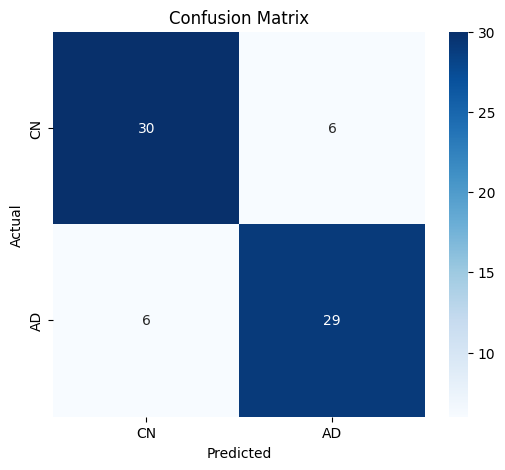


Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        36
           1       0.83      0.83      0.83        35

    accuracy                           0.83        71
   macro avg       0.83      0.83      0.83        71
weighted avg       0.83      0.83      0.83        71



In [50]:
# === Predict ===
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # for ROC/PR curves

# === Confusion Matrix ===
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["CN", "AD"], yticklabels=["CN", "AD"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# === Classification Report ===
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

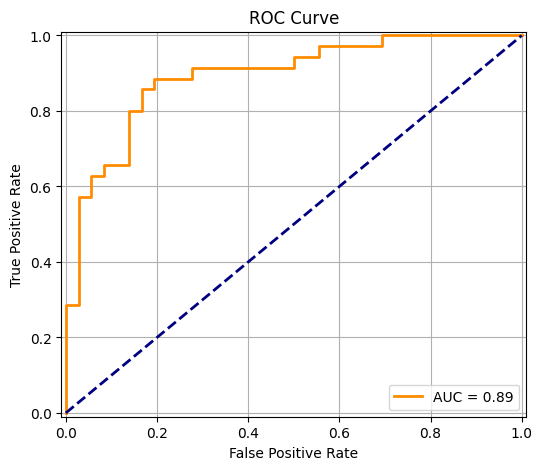

In [51]:
# === ROC Curve ===
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

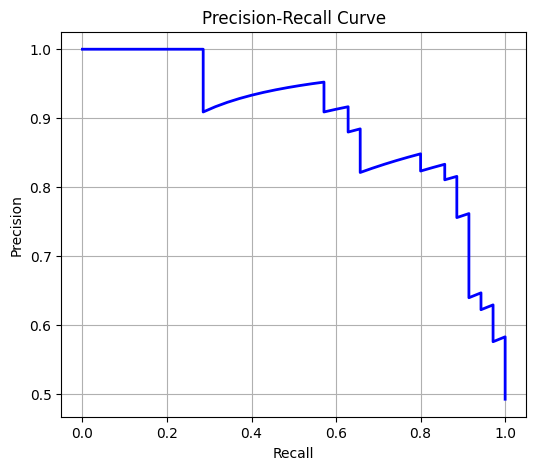

In [52]:
# === Precision-Recall Curve ===
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()